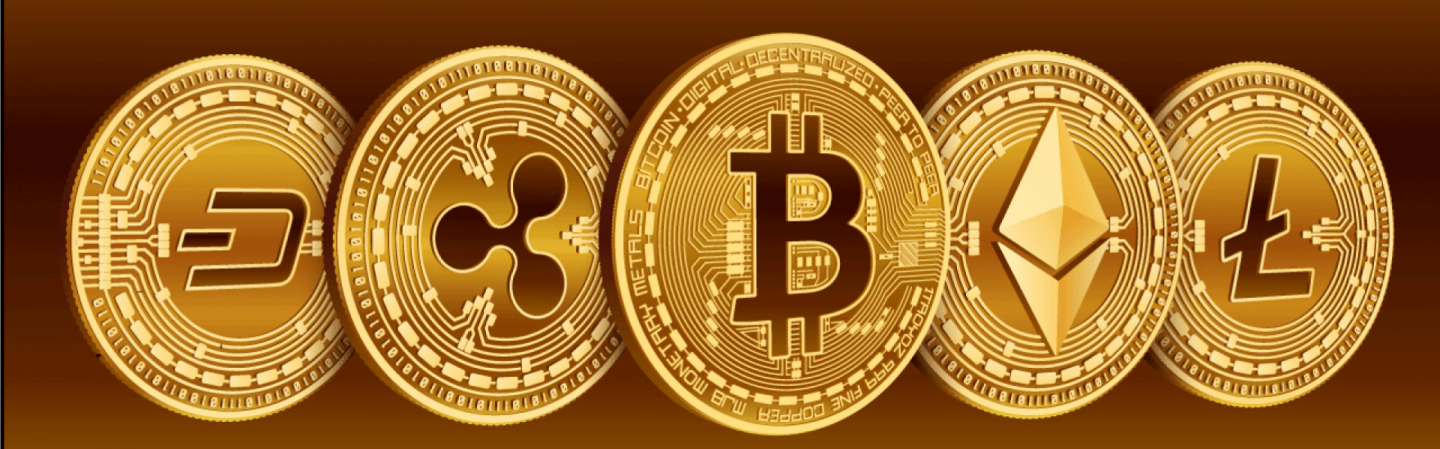

Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. Included here is historical bitcoin market data at 1-min intervals for select bitcoin exchanges where trading takes place. Happy (data) mining!


Here we are gonna froecast the Cryptocurrency value using the ARMA family of time-series forecasting models including AR, MA, ARMA, ARIMA, SARIMA,Auto ARIMA and triple exponential smoothing of the Statsmodels library and find the best model based on AIC, BIC and LLR values

Ref: https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
df= pd.read_csv(r'C:\Univ\3rd Semester\Data science\Tiime Series\UDEMY_TSA_FINAL\Data\bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv')

In [7]:
df.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['Time']= pd.to_datetime(df['Timestamp'],unit='s')

In [9]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Time
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:57:00
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:58:00
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:59:00
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 08:00:00
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 08:01:00


In [10]:
df.set_index('Time',inplace=True,)

In [11]:
df.drop('Timestamp',axis=1, inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Time,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Bitcoin exchanges for the time period of Jan 2012 to April 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. Timestamps without any trades or activity have their data fields filled with NaNs. If a timestamp is missing, or if there are jumps, this may be because the exchange (or its API) was down, the exchange (or its API) did not exist, or some other unforseen technical error in data reporting or gathering.

As the frequency of the recorded data is from minute basis we need to convert into Month basis so that we can work with it

Setting the frequency by using resampling makes the data easir to forecast rather than having minute to minute frequency

In [13]:
df= df.resample('M').mean() # Resampling to monthly end frequency

In [14]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Time,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091


In [15]:
df.index

DatetimeIndex(['2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31',
               '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31',
               '2012-08-31', '2012-09-30',
               ...
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30'],
              dtype='datetime64[ns]', name='Time', length=101, freq='M')

We can see from the above results that the datetime index has been changed to Month end frequency with freq='M'.

Now the data is ready for modelling

In [12]:
df.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [65]:
trace0 = go.Scatter(x=df.index, y=df.Weighted_Price, name='Weighted_price')
layout = dict(title={'text': "The line plot of Weighted Price",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            )
data = [trace0]

fig = go.Figure(data = data, layout = layout)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

<u>Stationarity is an important concept in time series analysis. </u>

1.  Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.

2.  Stationarity is important because many useful analytical tools and statistical tests and models rely on it.


By default most of the time series will have the time properties such as Trend, Seasonality and repetitive cycles which needs to be removed.

The Series is said to be stationary if it has:

    1. Constant Mean over time
    2. Constant variance over time
    3. Covariance is not timedependent
    
But from the above plot of the Weighted price of Crypto currency indicates that the data has both trend(linear and seasonality) and some repetitive cycle

<u>To remove the trend and seasonality from the data we have various techniques:</u>

   • To achieve <font color='red'>Constant Mean</font> (as trend will not have constant mean) we can do <font color='red'>Differencing or Seasonal Differencing </font>where the former will be used to remove the **``Linear trend``** and the latter will be used to remove the **``Seasonality trend``**
    
   • To achieve <font color='red'>Constant Variance </font>(as Seasonality will not have constant variance) we can do any <font color='red'>Power Transformation such as Square-root , Logrithmic or Box-Cox transformation </font>which will stabilize the variance over time and achieve normal distribution as well. some times doing the differencing itself will make the variance constant, if it is not check the data once by plotting and do the Power transformation. Hint: use Seasonal decomposition to find the seasonal component
   
   
After completing all the required transformations we can check whether the data become stationary or not by using the Dickey-Fuller Test

### Seasonal Decomposition to check for trend and seasonality in the data

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [26]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Time,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091


In [90]:
results =seasonal_decompose(df['Weighted_Price'],model='additive');

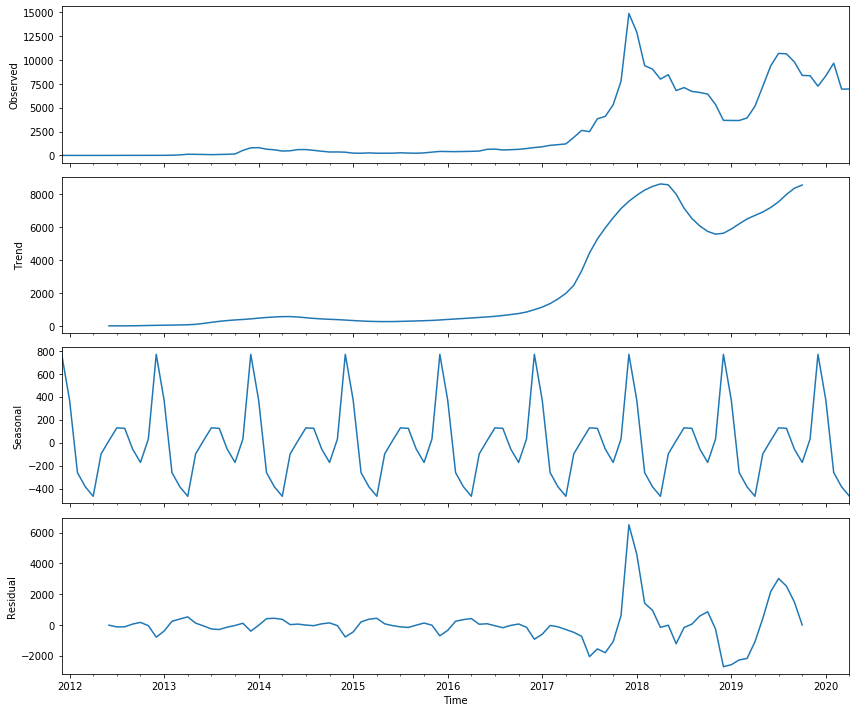

In [100]:
from pylab import rcParams
rcParams['figure.figsize']= 12,10
results.plot();


From the above figure we can confirm the presence of boht Trend and Seasonality in the data

### Dickey-Fuller Test to check the Stationary of the data

In [123]:

def test_stationarity(timeseries, seasonality_period=0):
    from statsmodels.tsa.stattools import adfuller
    #Determing rolling statistics
    
    rolmean = timeseries.rolling(seasonality_period).mean()
    

    #Plot rolling statistics:
    plt.figure(figsize=(10,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Raw data')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:].dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    while True:
        if dfoutput['p-value'] <= 0.01:
            print('\nThe Data is Stationary at 1%, 5% & 10% Significance level')
            break
        elif (dfoutput['p-value'] <= 0.05) and (soutput['p-value'] > 0.01):
            print('\nThe Data is Stationary at 5% & 10% Significance level but not at 1%')
            break
        elif (dfoutput['p-value'] <= 0.10) and (soutput['p-value'] > 0.05):
            print('\nThe Data is Stationary at 10% Significance level but not at 5% or 1%')
            break
        else:
            print('\nThe Data is Non-Stationary')
            break

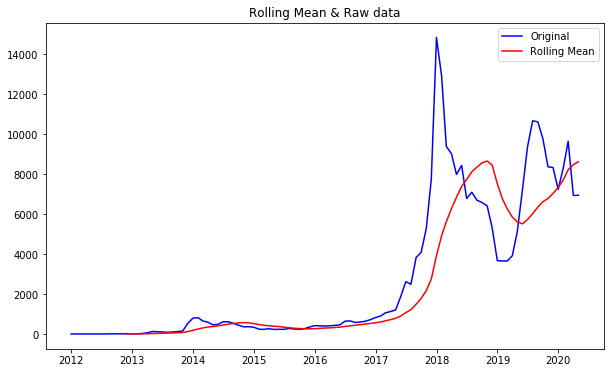

Results of Dickey-Fuller Test:
Test Statistic                 -1.723045
p-value                         0.419280
No of Lags Used                 1.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64

The Data is Non-Stationary


In [124]:
test_stationarity(df['Weighted_Price'],12) #when we are choosing seasonality as 3 we get some pretty close results than 12

From the above plot we can see that the ``rolling mean``(Red) is varying over time and also from the results of Dickey-Fuller test we can see that the p-value is 0.419 which is greater than 0.05 confidence interval, hence we reject the Alternate hypothesis(Stationary) in favour of Null Hypothesis(Non-Stationary)

## De-Trending by Differencing

In [46]:
df['Weighted_Price_diff'] =df['Weighted_Price'].diff(periods=1)

In [47]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_diff
Time,,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,NaN
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955,1.874352
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443,-1.117512
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397,-0.244046
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091,0.010693


In [63]:
trace0 = go.Line(x=df.index, y=df.Weighted_Price, name='Weighted_price')
trace1 = go.Line(x=df.index, y=df.Weighted_Price_diff, name='Differenced_Weighted_price')
layout = dict(title={'text': "Original data vs Differenced data\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            )
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

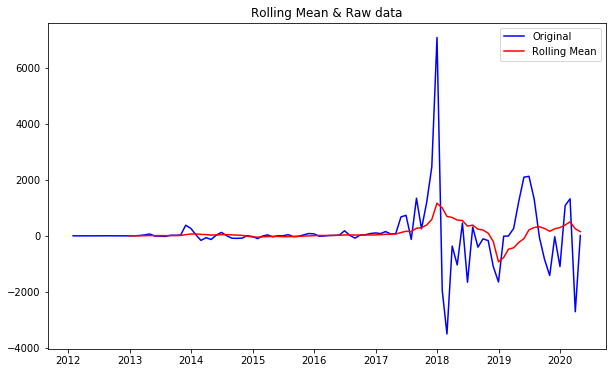

Results of Dickey-Fuller Test:
Test Statistic                -7.916710e+00
p-value                        3.818991e-12
No of Lags Used                0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64

The Data is Stationary at 1%, 5% & 10% Significance level


In [125]:
test_stationarity(df['Weighted_Price_diff'],12)

As we can see from above plot the ``rolling mean`` is somewhat less fluctuant when compared with the original data, but the differenced data is Stationary as per the Dickey-Fuller test. Hence we can stop the differencing otherwise we have to do one more differencing on top of the first order differencing

After the first differecing we can see that the variance is not constant over time which can be rectified by using power transformation

### Box-Cox Transformation

Inorder to make the variance constant for the series we can do the box-cox transformation which is the best method. Before that first analyze the data

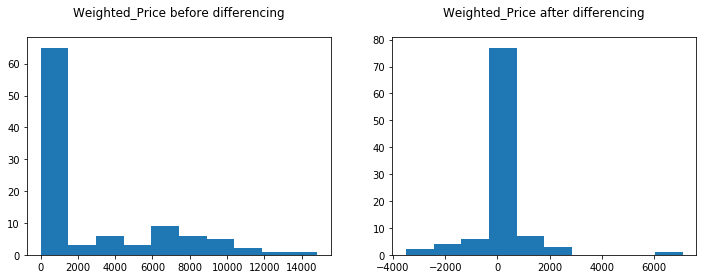

In [108]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(df['Weighted_Price'])
ax1.set_title('Weighted_Price before differencing\n');
ax2.hist(df['Weighted_Price_diff'])
ax2.set_title('Weighted_Price after differencing\n');

Note that we need to do the box-cox transforamtion for the data before differencing only as the difference data will have negative valeus which will throws error when taking logs.

In the Box-Cox function we have 2 arguments:

    • lmbda -->  None will find a suitable value for lambda or Number will do the transformation for that value(as like below)
    if the lambda = -1     --> Reciprocal Transformation
    if the lambda = -0.5   --> Reciprocal square root transformation
    if the lambda = 0      --> Logrithmic Transformation
    if the lambda = 0.5    --> Square root Transformation
    if the lambda = 1      --> No Transformation

    • alpha--> Confidence interval (default value is 0.05)

In [109]:
from scipy.stats import boxcox

In [16]:
from scipy.stats import boxcox
df['Weighted_Price_box'], lam = boxcox(df['Weighted_Price'])
print(f'The best lmda value selected for the box-cox transformation is : {lam}')

The best lmda value selected for the box-cox transformation is : 0.12942142357566233


In [111]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_diff,Weighted_Price_box
Time,,,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,NaN,1.652761
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955,1.874352,2.087486
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443,-1.117512,1.844509
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397,-0.244046,1.785479
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091,0.010693,1.788118


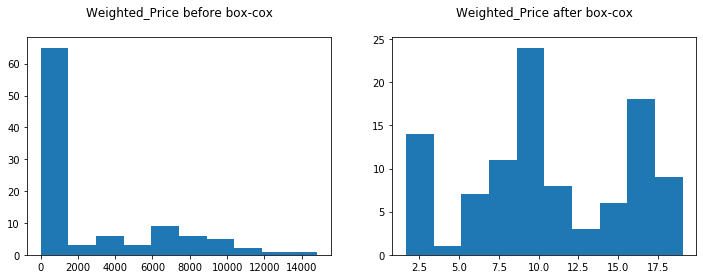

In [112]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(df['Weighted_Price'])
ax1.set_title('Weighted_Price before box-cox\n');
ax2.hist(df['Weighted_Price_box'])
ax2.set_title('Weighted_Price after box-cox\n');

In [114]:
trace0 = go.Line(x=df.index, y=df.Weighted_Price, name='Weighted_price');
trace1 = go.Line(x=df.index, y=df.Weighted_Price_box, name='Box-cox Weighted_price');
layout = dict(title={'text': "Original data vs Box-cox data\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

From above we can see that the box-cox transformation made the series with constant variance but in the plot we are seeing a straight line becasue of the scaling problem. But do keep in mind that the box-cox transformed data is non stationary still as the differencing is yet to be done

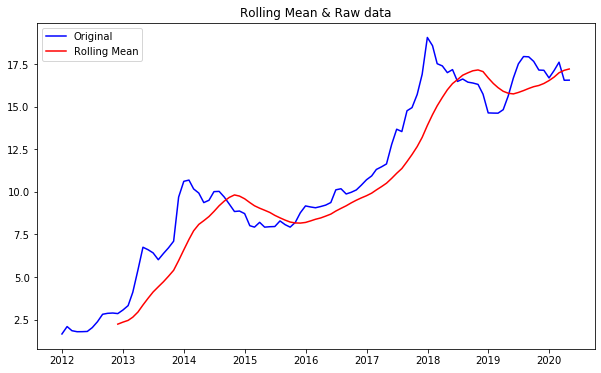

Results of Dickey-Fuller Test:
Test Statistic                 -1.327359
p-value                         0.616565
No of Lags Used                 1.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64

The Data is Non-Stationary


In [126]:
test_stationarity(df['Weighted_Price_box'],12)

In [127]:
df['Weighted_Price_box_diff'] =df['Weighted_Price_box'].diff(periods=1)

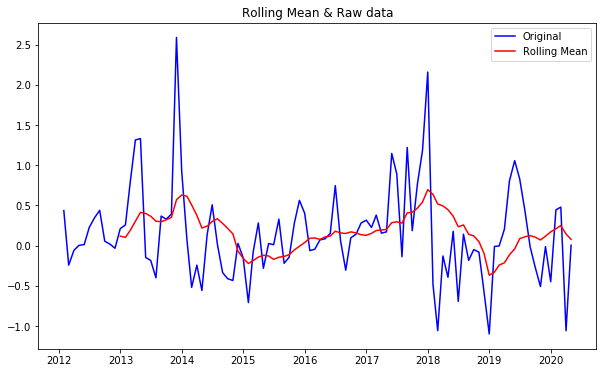

Results of Dickey-Fuller Test:
Test Statistic                -6.639184e+00
p-value                        5.464551e-09
No of Lags Used                0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64

The Data is Stationary at 1%, 5% & 10% Significance level


In [128]:
test_stationarity(df['Weighted_Price_box_diff'],12)

So after the box-cox transformation to make the variance constant we did first order differencing to make the mean constant , now the data should be stationary which is confirmed with the DF test above.

Let's  move to the ARIMA time-series modelling for forecasting


# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>


ReferenceL https://otexts.com/fpp2/arima-ets.html

Now we will beusing the ARIMA model with cusotmized parameters equal to AR model for simplicity. Note that all teh ARIMA models require the data to be ``Stationary`` otherwise the performance of the model will be poor.

Before moving to the ARIMA concepts we need to know what is <font color='red'>Auto-correlation</font> and <font color='red'>Partial auto-correlation</font> .

• Auto correlation also known as serial correlation, is the correlation of a variable with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them. we use this ACF plot(Correllogram) to know how many lags(past values) are having the influence over today's or current data. Hint: The autocorrelation includes both the direct and indirect relationship (correlation) 

• Partial autocorrelation gives the partial correlation of a stationary time series with its own lagged values after removing the interveining values (ie) it depicts only the direct correlation of the past data(lagged values) with the current data ater removing the indirect correlation

Ref:https://people.duke.edu/~rnau/411arim3.htm

In [131]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Now we will plot the ACF and PACF plots for the original data before differencing and box-cox transformation because the differencing makes the data stationary and also removes the autocorrelation  

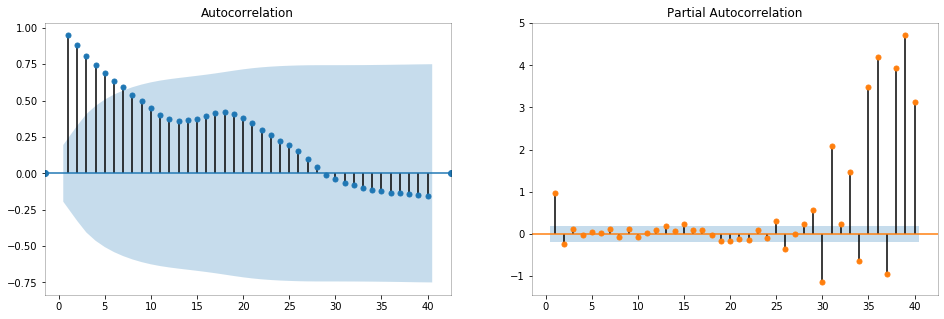

In [135]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
plot_acf(df['Weighted_Price'],lags=40, ax=ax1, marker='o',zero=False) #using 40 past values only as more values will clutter the plot
plot_pacf(df['Weighted_Price'],lags=40, ax=ax2,method='ols',zero=False,color='tab:orange') #zero = false to remove the first data
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

plt.show()


From the autocorrelation plot we can infer that the past values(till the 7th lag only) have influence over current data (the blue shaded region represents the confidence region where if the lag falls into that , it indicates that the lag is insignificant and has no influence over current data). The ACF plot makes sense as the time goes the past data doesn't have much of the influence over the current data(by submerging into the blue shaded region) but the recent data does have influence which will be over the blue region.

From the Partial autocorrelation plot we can infer that the recent data values doesnot have much of influence but the past values from far has much of a correlation which is a intersting insight in this dataset but usually we never have a PACF plot like this where the far past values have influence , only the recent values will have influence.

Now we will plot the ACF and PACF plots for the differenced data 

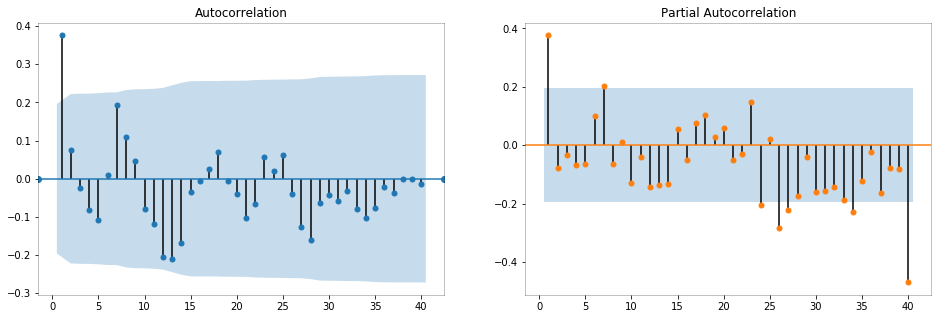

In [138]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
plot_acf(df['Weighted_Price_box_diff'].dropna(),lags=40, ax=ax1, marker='o',zero=False) #using 40 past values only as more values will clutter the plot
plot_pacf(df['Weighted_Price_box_diff'].dropna(),lags=40, ax=ax2,method='ols',zero=False,color='tab:orange') #zero = false to remove the first data
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

plt.show()


As the differencing is done the autocorrelation will be eliminated which can be seen in ACF plot and the PACF plot as well.

In ACF plot we can see that only the first lag is having influence and in the PACF plot informs the same

### Data Partitioning

In [144]:
df.shape

(101, 10)

In [147]:
df.tail(16) # have the last 16 values includes a year and +4 months

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_diff,Weighted_Price_box,Weighted_Price_box_diff
Time,,,,,,,,,,
2019-01-31,3659.472360,3660.650795,3658.390447,3659.577965,5.142877,18878.292240,3659.467919,-12.951386,14.618103,-0.010219
2019-02-28,3653.627009,3654.620806,3652.710952,3653.709667,5.494794,20299.446112,3653.638677,-5.829243,14.613494,-0.004610
2019-03-31,3919.378973,3920.111584,3918.656991,3919.413098,4.034113,15786.870156,3919.370872,265.732195,14.817410,0.203916
2019-04-30,5139.134394,5141.188684,5137.045939,5139.195171,7.009113,35751.977101,5139.112145,1219.741273,15.621980,0.804570
2019-05-31,7234.354588,7239.740914,7228.710882,7234.086417,8.331579,61233.736564,7234.325315,2095.213170,16.678518,1.056538
2019-06-30,9361.864604,9369.376206,9353.968650,9361.411365,7.797679,78088.325828,9361.787472,2127.462156,17.506528,0.828010
2019-07-31,10671.944989,10680.690348,10662.658929,10672.149661,8.345824,89631.227742,10671.368501,1309.581029,17.937746,0.431218
2019-08-31,10618.244129,10624.139355,10611.628380,10617.729889,5.675777,60917.756522,10617.966133,-53.402368,17.921088,-0.016658
2019-09-30,9786.282584,9791.275409,9779.898713,9783.826320,5.085752,48032.382862,9786.434235,-831.531898,17.651815,-0.269272


In [17]:
#note that we have to use only the power transformed dataset (ie) box-cox transformation
train = df[['Weighted_Price','Weighted_Price_box']].iloc[:-16]

In [18]:
test = df[['Weighted_Price','Weighted_Price_box']].iloc[-16:]

In [19]:
train.shape

(85, 2)

In [20]:
train.head()

,Weighted_Price,Weighted_Price_box
Time,,
2011-12-31,4.471603,1.652761
2012-01-31,6.345955,2.087486
2012-02-29,5.228443,1.844509
2012-03-31,4.984397,1.785479
2012-04-30,4.995091,1.788118


In [21]:
test.shape

(16, 2)

In [22]:
test.head()

,Weighted_Price,Weighted_Price_box
Time,,
2019-01-31,3659.467919,14.618103
2019-02-28,3653.638677,14.613493
2019-03-31,3919.370872,14.817409
2019-04-30,5139.112145,15.621979
2019-05-31,7234.325315,16.678518


In [23]:
start = '2019-01-31'

In [24]:
end = '2020-04-30'

In [25]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA  # Auto Regressive Integrated Moving Average (ARIMA)

<font color='red'>ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')</font>

The ``endog`` argument accepts the dataframe to be modelled 

The argument ``order`` accepts 3 values  (p,d,q)

1. From the PACF plot we can see that only the first lag value have influence over the current data so the ``'p'`` value (parameter) for the <font color='red'>'AR'</font> component is 1 

2. Instead of we computing the differencing for the data to make it stationary we can use the <font color='red'>'I' </font>component(Integrated) of ARIMA model which has a parameter ``'d'`` inidcates the order of differencing so we can simply mention 1 for first order differencing 

3. From the Autocorrelation plot (ACF) we can see that there are lots of lags(till 7th lag) has the influence so we can add ``'q'`` as 7 in the model for teh <font color='red'>'MA' </font>component 


but in this model we are gonna see only for the AR part so we are not gonna pass the ``q`` value

In [179]:
AR_model = ARIMA(train['Weighted_Price_box'], order=(1,1,0)).fit() 
#we will be using the box-cox transformed data for training

Now the AR model will be fitted and we can call the results and predict the new values out of it from the variable AR_model

In [180]:
AR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.Weighted_Price_box   No. Observations:                   84
Model:                   ARIMA(1, 1, 0)   Log Likelihood                 -67.884
Method:                         css-mle   S.D. of innovations              0.542
Date:                  Wed, 15 Jul 2020   AIC                            141.769
Time:                          20:31:22   BIC                            149.061
Sample:                      01-31-2012   HQIC                           144.700
                           - 12-31-2018                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1472      0.096      1.533      0.129      -0.041       0.336
ar.L1.D.Weighted_Price_box     0.3883      0.103      3.770      0.000       0.186       0.590
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5756           +0.0000j            2.5756            0.0000
-----------------------------------------------------------------------------
"""

From the model summary we can see that the 1st coefficient is significant as per its p-value , now let's verify the 2nd lag by adding the ``'p'`` component as 2  for experimentation after examing the residuals of this model first

Now let's predict the future 1 year values as in the test dataset, but the prediction whcih the model is gonna spit out is in teh scale of box-cox transformation and we need to inverse the effect by using the below function

In [26]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lam): #the lmb value is already there in the above code
    if lam == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lam*y+1)/lam))

 We know the basics of Power Transformation is that, 
 
 if the data is having a <font color='red'>quadratic growth</font> then it can be made linear by using the <font color='red'>squar root transformation</font> and 
 
 if the data is having <font color='red'>exponential growth</font> then we will use <font color='red'>logrithmic transformation</font> to make it linear and 
 
 the <font color='red'>box-cox</font> will be used when both the logrithmic and square root transformation fails to linearize the data.
 
 From the above basics we know that if a data is logrithmic then it can be turned back by using exponential transformation , likewise we can inverse the box-cox transformation by the above mentioned formula

In [193]:
test['AR_pred']=invboxcox(AR_model.predict(start = start,  end= end, typ='levels'),lam)
# make sure we put the type= levels as it only gives teh values in the undifferenced levels

In [194]:
test.head()

,Weighted_Price,Weighted_Price_box,AR_pred
Time,,,
2019-01-31,3659.467919,14.618103,3266.093472
2019-02-28,3653.638677,14.613494,3219.786098
2019-03-31,3919.370872,14.817410,3304.832630
2019-04-30,5139.112145,15.621980,3445.043404
2019-05-31,7234.325315,16.678518,3612.024483


In [195]:
trace0 = go.Line(x=test.index, y=test.Weighted_Price, name='Actual values');
trace1 = go.Line(x=test.index, y=test.AR_pred, name='AR Predictions');
layout = dict(title={'text': "Actual data vs Prediction\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

In [231]:
trace0 = go.Line(x=train.index, y=train.Weighted_Price, name='Actual train values');
trace1 = go.Line(x=train.index, y=invboxcox(AR_model.fittedvalues,lam), name='AR train Predictions');
layout = dict(title={'text': "Actual data vs Prediction for AR model training data\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

From the model summary we can see that the 1st coefficient is significant as per its p-value , now let's verify the 2nd lag by adding the ``'p'`` component as 2  for experimentation after examing the residuals of this model first

In [27]:
def resid_exam(model):
    """The Residuals will be examined to check for any room for improvement and also to verify the properties of the residuals.The parameters needed are the model's name """
    model.resid.plot(figsize=(14.5,6),title='\n\nTraining Residuals plot', label=' Training Residuals',legend=True)
    plt.axhline(model.resid.mean(), color='grey', linestyle='--', linewidth=1)
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    import seaborn as sns 
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))
    plot_acf(model.resid,lags=40, ax=ax1, marker='o')
    plot_pacf(model.resid,lags=40, ax=ax2,method='ols',zero=False)
    ax3.scatter(x=model.fittedvalues,y=model.resid, label='Residuals')
    ax3.plot( [min(model.fittedvalues),max(model.fittedvalues)],[0,0] ,color='tab:red', lw=2, linestyle='--');
    ax3.set_title('Residuals Variance')
    ax4=sns.kdeplot(data=model.resid ,label='Residuals',shade=True);
    ax4.set_title('Residuals distribution')
    ax4.axvline(model.resid.mean(), color='g', linestyle='dashed', linewidth=2)
    plt.tight_layout()
    plt.show()
    print('\nResiduals statistics:')
    print(f"   Mean     : {round(model.resid.mean(),3)}  \n   Variance : {round(model.resid.var(),3)}\n")
    print('\nResiduals Stationary Test(Dickey-Fuller):')
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    stest = adfuller(model.resid.dropna(), autolag='AIC')
    soutput = pd.Series(stest[0:4], index=['Test Statistic','p-value','No of Lags Used','Number of Observations Used'])
    for key,value in stest[4].items():
        soutput['Critical Value (%s)'%key] = value
    print (soutput)
    while True:
        if soutput['p-value'] <= 0.01:
            print('\nThe Residuals are Stationary at 1%, 5% & 10% Significance level')
            break
        elif (soutput['p-value'] <= 0.05) and (soutput['p-value'] > 0.01):
            print('\nThe Residuals are Stationary at 5% & 10% Significance level but not at 1%')
            break
        elif (soutput['p-value'] <= 0.10) and (soutput['p-value'] > 0.05):
            print('\nThe Residuals are Stationary at 10% Significance level but not at 5% or 1%')
            break
        else:
            print('\nThe Residuals are Non-Stationary')
            break
    

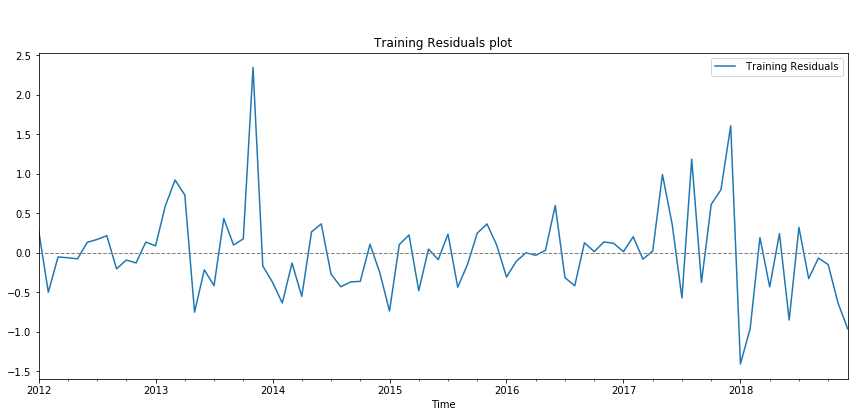

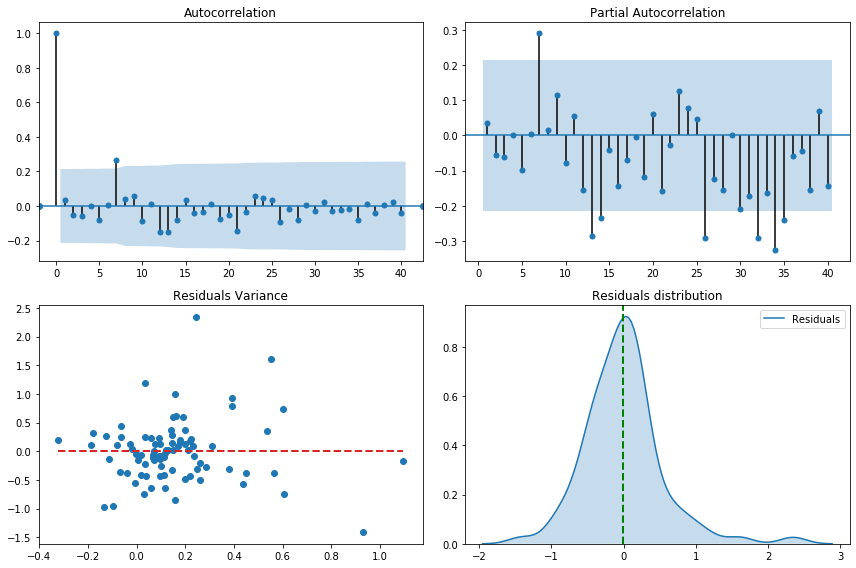


Residuals statistics:
   Mean     : -0.001  
   Variance : 0.298


Residuals Stationary Test(Dickey-Fuller):
Test Statistic                -8.534160e+00
p-value                        1.018632e-13
No of Lags Used                0.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64

The Residuals are Stationary at 1%, 5% & 10% Significance level


In [204]:
resid_exam( AR_model)

In [206]:
AR_model2 = ARIMA(train['Weighted_Price_box'], order=(2,1,0)).fit() 
#we will be using the box-cox transformed data for training
print(AR_model2.summary())
test['AR_pred2']=invboxcox(AR_model2.predict(start = start,  end= end, typ='levels'),lam)
# make sure we put the type= levels as it only gives teh values in the undifferenced levels

                              ARIMA Model Results                               
Dep. Variable:     D.Weighted_Price_box   No. Observations:                   84
Model:                   ARIMA(2, 1, 0)   Log Likelihood                 -67.597
Method:                         css-mle   S.D. of innovations              0.541
Date:                  Wed, 15 Jul 2020   AIC                            143.195
Time:                          21:05:17   BIC                            152.918
Sample:                      01-31-2012   HQIC                           147.103
                           - 12-31-2018                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1504      0.088      1.702      0.093      -0.023       0.324
ar.L1.D.Weighted_Price_box     0.4194      0.111      3.791      0.

As we can see from the model summary adding the 2nd lag doesnot improve the model which is evident by seeing the p-value of the second coefficient which is more than 0.05 (similar to the PACF plot of residuals where the second lag is inside the insignificant blue region)

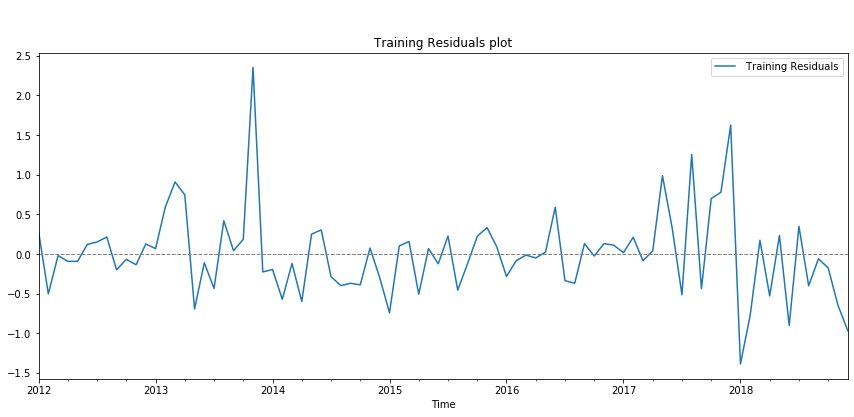

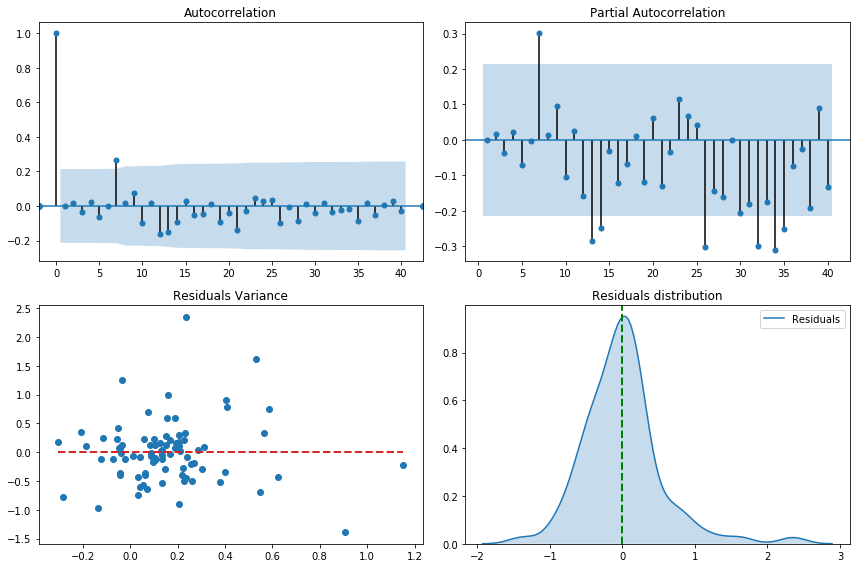


Residuals statistics:
   Mean     : -0.001  
   Variance : 0.296


Residuals Stationary Test(Dickey-Fuller):
Test Statistic                -8.845422e+00
p-value                        1.625675e-14
No of Lags Used                0.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64

The Residuals are Stationary at 1%, 5% & 10% Significance level


In [207]:
resid_exam(AR_model2)

From the residuals plot we can see that the 7th lag in the PACF having some influence over the current data but the lags inbetween 1 to 7 is not , thats why in the residuals plot we are seeing the 7th lag above the blue region as it is not accounted in the model. 
Now lets see whether the 8th lag is removed form the residuals plot by adding ``p`` component as 8

In [208]:
AR_model3 = ARIMA(train['Weighted_Price_box'], order=(8,1,0)).fit() 
#we will be using the box-cox transformed data for training
print(AR_model3.summary())
test['AR_pred3']=invboxcox(AR_model3.predict(start = start,  end= end, typ='levels'),lam)
# make sure we put the type= levels as it only gives teh values in the undifferenced levels


                              ARIMA Model Results                               
Dep. Variable:     D.Weighted_Price_box   No. Observations:                   84
Model:                   ARIMA(8, 1, 0)   Log Likelihood                 -64.072
Method:                         css-mle   S.D. of innovations              0.516
Date:                  Wed, 15 Jul 2020   AIC                            148.143
Time:                          21:11:34   BIC                            172.452
Sample:                      01-31-2012   HQIC                           157.915
                           - 12-31-2018                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1315      0.116      1.129      0.262      -0.097       0.360
ar.L1.D.Weighted_Price_box     0.4157      0.111      3.752      0.

From the above summary we can see the p-values of all coefficients which are insignificant except 1 and the 7th is somewhat having lower p value when compared with others coefficients (same was depicted by PACF plot of residuals)

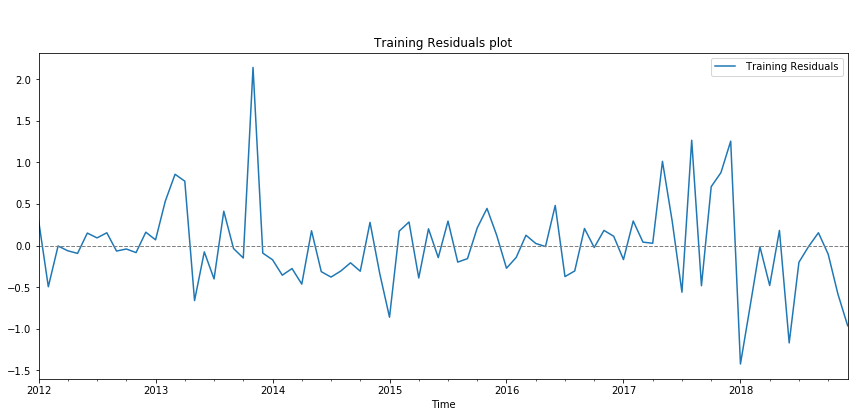

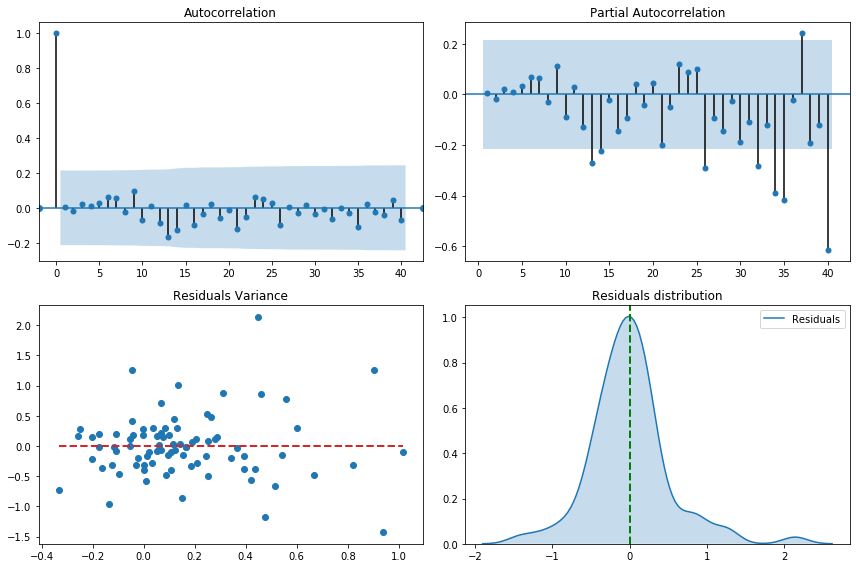


Residuals statistics:
   Mean     : -0.001  
   Variance : 0.271


Residuals Stationary Test(Dickey-Fuller):
Test Statistic                -8.786152e+00
p-value                        2.305754e-14
No of Lags Used                0.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64

The Residuals are Stationary at 1%, 5% & 10% Significance level


In [209]:
resid_exam(AR_model3)

<font color='red'>Now we can see the PACF plot that the 7th lag is not under the blue region as it has been accounted in the model</font>

As a conclusion from the forecast we can see that the AR model is not upto the task , so let's EXPLORE the MA model seperatley . Later we will combine the AR & MA to make ARIMA model

From the ACF plot of the raw data we can see that the lags upto 7 have influence so lets add the 1 parameter as 7

# Moving Average Model

In [210]:
MA_model = ARIMA(train['Weighted_Price_box'], order=(0,1,7)).fit()  #by adding p =0 makes teh AR componet null
#we will be using the box-cox transformed data for training
print(MA_model.summary())
test['MA_pred']=invboxcox(MA_model.predict(start = start,  end= end, typ='levels'),lam)
# make sure we put the type= levels as it only gives teh values in the undifferenced levels


                              ARIMA Model Results                               
Dep. Variable:     D.Weighted_Price_box   No. Observations:                   84
Model:                   ARIMA(0, 1, 7)   Log Likelihood                 -62.711
Method:                         css-mle   S.D. of innovations              0.504
Date:                  Wed, 15 Jul 2020   AIC                            143.422
Time:                          21:23:44   BIC                            165.299
Sample:                      01-31-2012   HQIC                           152.216
                           - 12-31-2018                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1388      0.105      1.324      0.189      -0.067       0.344
ma.L1.D.Weighted_Price_box     0.3775      0.107      3.529      0.

In [211]:
test.head(5)

,Weighted_Price,Weighted_Price_box,AR_pred,AR_pred2,AR_pred3,MA_pred
Time,,,,,,
2019-01-31,3659.467919,14.618103,3266.093472,3294.147330,3033.242346,2869.876719
2019-02-28,3653.638677,14.613494,3219.786098,3366.409769,3027.194254,3088.673195
2019-03-31,3919.370872,14.817410,3304.832630,3549.995513,3087.060431,3462.750283
2019-04-30,5139.112145,15.621980,3445.043404,3750.350122,3195.963221,3702.935198
2019-05-31,7234.325315,16.678518,3612.024483,3953.688760,3336.504611,3784.199809


In [212]:
trace0 = go.Line(x=test.index, y=test.Weighted_Price, name='Actual values');
trace1 = go.Line(x=test.index, y=test.MA_pred, name='MA Predictions');
layout = dict(title={'text': "Actual data vs Prediction for MA model\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

In [229]:
trace0 = go.Line(x=train.index, y=train.Weighted_Price, name='Actual train values');
trace1 = go.Line(x=train.index, y=invboxcox(MA_model.fittedvalues,lam), name='MA train Predictions');
layout = dict(title={'text': "Actual data vs Prediction for MA model training data\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

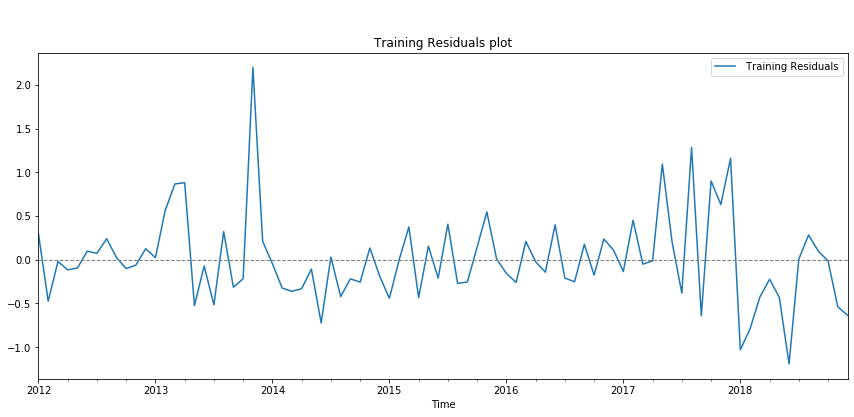

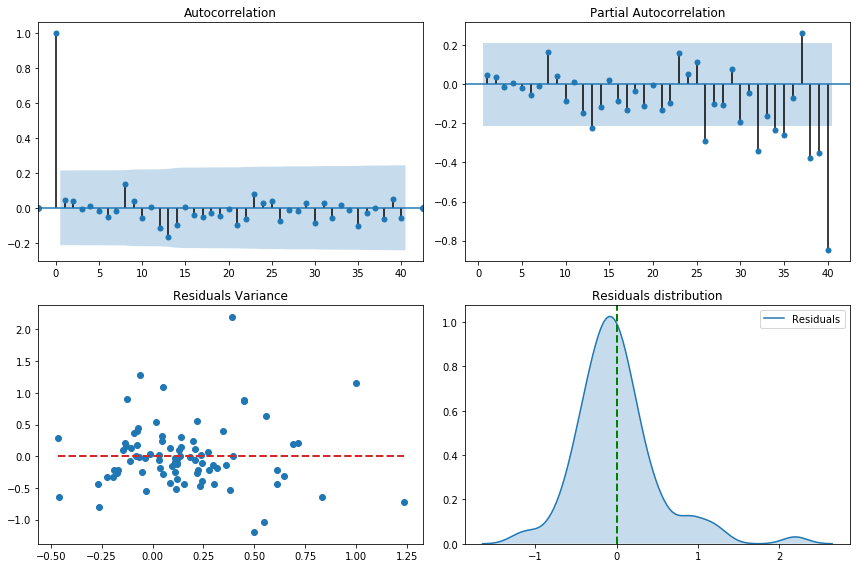


Residuals statistics:
   Mean     : 0.0  
   Variance : 0.259


Residuals Stationary Test(Dickey-Fuller):
Test Statistic                -8.519149e+00
p-value                        1.112832e-13
No of Lags Used                0.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64

The Residuals are Stationary at 1%, 5% & 10% Significance level


In [213]:
resid_exam(MA_model)

From the predicted values we can see that the model is not predicting well , so let's add both AR and MA model together to compute the forecast.

Note that when we are doing modelling we should experiment with various p,d,q values to obtain a best fitted model , but here as we are exploring all the models we are jumping sooner to the other models

# Auto Regressive Integrated Moving Average ARIMA

In [215]:
train['Weighted_Price_box']

Time
2011-12-31     1.652761
2012-01-31     2.087486
2012-02-29     1.844509
2012-03-31     1.785479
2012-04-30     1.788118
                ...    
2018-08-31    16.434202
2018-09-30    16.384221
2018-10-31    16.302634
2018-11-30    15.727479
2018-12-31    14.628323
Freq: M, Name: Weighted_Price_box, Length: 85, dtype: float64

In [217]:
ARIMA_model = ARIMA(train['Weighted_Price_box'], order=(1,2,7)).fit()  #here i gave order d as 2 as giving 1 makes the data still non-stationary
#we will be using the box-cox transformed data for training
print(ARIMA_model.summary())
test['ARIMA_pred']=invboxcox(ARIMA_model.predict(start = start,  end= end, typ='levels'),lam)
# make sure we put the type= levels as it only gives thE values in the undifferenced levels


                               ARIMA Model Results                               
Dep. Variable:     D2.Weighted_Price_box   No. Observations:                   83
Model:                    ARIMA(1, 2, 7)   Log Likelihood                 -66.143
Method:                          css-mle   S.D. of innovations              0.510
Date:                   Wed, 15 Jul 2020   AIC                            152.286
Time:                           21:34:32   BIC                            176.475
Sample:                       02-29-2012   HQIC                           162.004
                            - 12-31-2018                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0074      0.037     -0.200      0.842      -0.080       0.065
ar.L1.D2.Weighted_Price_box    -0.6012      0.139     -4

From above we can see that we have 3 significant coefficients when compared with simple AR or MA models

In [218]:
trace0 = go.Line(x=test.index, y=test.Weighted_Price, name='Actual values');
trace1 = go.Line(x=test.index, y=test.ARIMA_pred, name='ARIMA Predictions');
layout = dict(title={'text': "Actual data vs Prediction for ARIMA model\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

In [230]:
trace0 = go.Line(x=train.index, y=train.Weighted_Price, name='Actual train values');
trace1 = go.Line(x=train.index, y=invboxcox(ARIMA_model.fittedvalues,lam), name='ARIMA train Predictions');
layout = dict(title={'text': "Actual data vs Prediction for ARIMA model training data\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

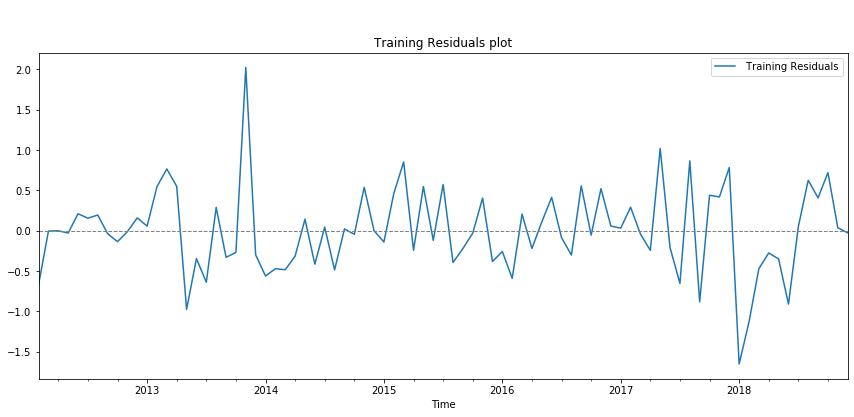

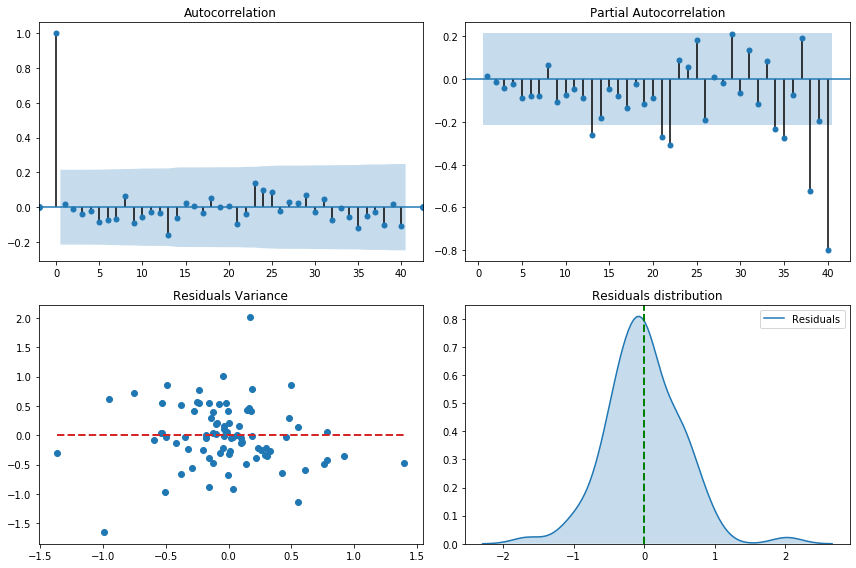


Residuals statistics:
   Mean     : -0.004  
   Variance : 0.285


Residuals Stationary Test(Dickey-Fuller):
Test Statistic                -8.879140e+00
p-value                        1.332601e-14
No of Lags Used                0.000000e+00
Number of Observations Used    8.200000e+01
Critical Value (1%)           -3.512738e+00
Critical Value (5%)           -2.897490e+00
Critical Value (10%)          -2.585949e+00
dtype: float64

The Residuals are Stationary at 1%, 5% & 10% Significance level


In [219]:
resid_exam(ARIMA_model)

Eventhough the residuals are stationary we can see that the forecast is not good,  Because there might be a seasonality in the data apart from the trend factor. 
As we are accounting only for the trend in the ``Integrated`` part of the ARIMA the seasonality factor was left out. so Let's now use the SARIMA model to account for the seasonality as well as Trend and forecast the results

# Seasonal Auto Regressive Integrated Moving Average SARIMA

In [220]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

<font color='red'>SARIMAX(endog,exog=None,order=(1, 0, 0),  seasonal_order=(0, 0, 0, 0), trend=None,  enforce_stationarity=True, enforce_invertibility=True)</font>

The order argument is same as in ARIMA model represents the p,d,q where the seasonal order presents capital P,D,Q,s which denotes the number of past seasonal cycle values , order of differencing , number of past Seasonal cycle errors and the seasonal periods cycle respectively

trend argument can be str{'n','c','t','ct'} based on the data but the usual vlaue will be 'ct' then the remaining parameters should stay as default for optimal performance

In [224]:
SARIMA_model = SARIMAX(train['Weighted_Price_box'], order=(1,1,7),seasonal_order=(2, 1, 1, 12) ).fit()  #the seasonal period is 12 here
#we will be using the box-cox transformed data for training
print(SARIMA_model.summary())
test['SARIMA_pred']=invboxcox(SARIMA_model.predict(start = start,  end= end, typ='levels'),lam)
# make sure we put the type= levels as it only gives thE values in the undifferenced levels


                                 Statespace Model Results                                 
Dep. Variable:                 Weighted_Price_box   No. Observations:                   85
Model:             SARIMAX(1, 1, 7)x(2, 1, 1, 12)   Log Likelihood                 -65.694
Date:                            Wed, 15 Jul 2020   AIC                            155.387
Time:                                    21:53:39   BIC                            182.707
Sample:                                12-31-2011   HQIC                           166.263
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5781      0.284      2.034      0.042       0.021       1.135
ma.L1         -0.2523      0.389   

In [225]:
trace0 = go.Line(x=test.index, y=test.Weighted_Price, name='Actual values');
trace1 = go.Line(x=test.index, y=test.SARIMA_pred, name='SARIMA Predictions');
layout = dict(title={'text': "Actual data vs Prediction for SARIMA model\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

In [228]:
trace0 = go.Line(x=train.index, y=train.Weighted_Price, name='Actual train values');
trace1 = go.Line(x=train.index, y=invboxcox(SARIMA_model.fittedvalues,lam), name='SARIMA train Predictions');
layout = dict(title={'text': "Actual data vs Prediction for SARIMA model training data\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

When compared with the other model's training data prediction the SARIMA model does a very good job 

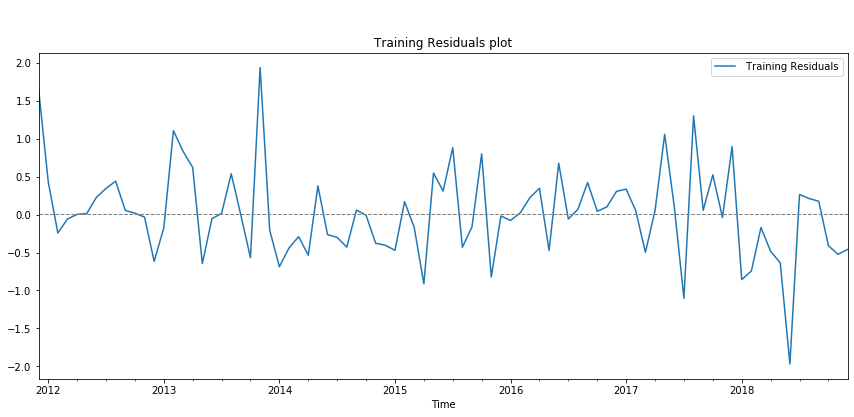

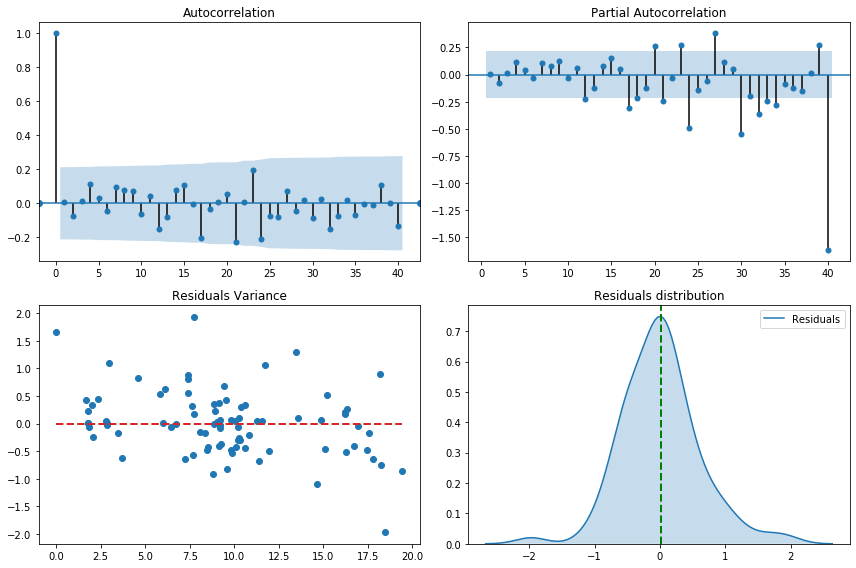


Residuals statistics:
   Mean     : 0.009  
   Variance : 0.354


Residuals Stationary Test(Dickey-Fuller):
Test Statistic                -9.390249e+00
p-value                        6.590593e-16
No of Lags Used                0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64

The Residuals are Stationary at 1%, 5% & 10% Significance level


In [232]:
resid_exam(SARIMA_model)

In [238]:
test.head(10)

,Weighted_Price,Weighted_Price_box,AR_pred,AR_pred2,AR_pred3,MA_pred,ARIMA_pred,SARIMA_pred
Time,,,,,,,,
2019-01-31,3659.467919,14.618103,3266.093472,3294.147330,3033.242346,2869.876719,2241.224780,1703.344883
2019-02-28,3653.638677,14.613494,3219.786098,3366.409769,3027.194254,3088.673195,1509.333049,1172.476704
2019-03-31,3919.370872,14.817410,3304.832630,3549.995513,3087.060431,3462.750283,1103.284874,1164.866111
2019-04-30,5139.112145,15.621980,3445.043404,3750.350122,3195.963221,3702.935198,850.275332,1183.007480
2019-05-31,7234.325315,16.678518,3612.024483,3953.688760,3336.504611,3784.199809,735.023952,1419.045499
2019-06-30,9361.787472,17.506528,3794.784490,4162.829711,3297.409213,3501.344388,588.573857,1226.893322
2019-07-31,10671.368501,17.937746,3989.103958,4380.529612,3040.115016,3289.985253,484.409842,933.567343
2019-08-31,10617.966133,17.921088,4193.473808,4607.977571,2925.451618,3453.493398,386.331950,1105.904160
2019-09-30,9786.434235,17.651815,4407.484802,4845.688914,2995.127707,3624.030991,309.327882,1069.570899


In [239]:
test.to_csv('test.csv')

Now we need to tune the parameters of SARIMA such as p,d,q,P,D,Q,s for the better model fit but such as grid search will consume a lot of time. Hence we have a special model called Auto-ARIMA model which intakes the max paramter values for each parameter and compute the models based on the combination of the parameter values and evaluate using the AIC values and spit out the best model. Lets try the Auto arima !!!

# Auto- ARIMA

In [4]:
from pmdarima import auto_arima

In [ ]:
auto_arima()

auto_arima(
exogenous=None,

start_p=2, # Starting value for the p order of AR component

d=None,  #starting value for the order of differencing

start_q=2, #Starting value for the q order of MA component

max_p=5,# Maximum value for the p order of AR component

max_d=2,#maximum value for the order of differencing

max_q=5,#Maximum value for the q order of MA component

start_P=1, #Starting value for the P order of AR component for seasonal factor

D=None, #starting value for the order of differencing for seasonal factor

start_Q=1,#Starting value for the q order of MA component for seasonal factor

max_P=2,# Maximum value for the p order of AR component for seasonal factor

max_D=1,#maximum value for the order of differencing for seasonal factor

max_Q=2,#Starting value for the q order of MA component for seasonal factor

max_order=5,# toal no of coefficients

m=1, # seasonal period for the seasonal factor

seasonal=True,

stationary=False,

information_criterion='aic', #evaluation method

alpha=0.05, #confidence interval

test='kpss',

stepwise=True,

n_jobs=1,

trend=None, # str{'n','c','t','ct'} 

maxiter=50,# no of iteration to converge

error_action='trace',

trace=False, #to print some of the output on console
)


In [29]:
autoARIMA_model = auto_arima(train['Weighted_Price_box'],max_p=6, max_q= 7,max_d=1,max_P=5,max_Q=5,max_D=1, m=12,seasonal=True,
                         information_criterion='aic',alpha=0.05,n_jobs=1,trend='ct',maxiter=500,trace=True)
#we will be using the box-cox transformed data for training
#note that the output of the prediction of the auto_arima will be an array but in ARIMA models it will be a dataframe


Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=145.200, BIC=167.077, Time=7.838 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=154.058, BIC=161.350, Time=0.061 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=142.978, BIC=155.132, Time=1.133 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=142.511, BIC=154.665, Time=0.846 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=154.058, BIC=161.350, Time=0.068 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=143.516, BIC=153.239, Time=0.362 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=144.133, BIC=158.718, Time=1.285 seconds
Fit ARIMA(0,1,1)x(0,0,2,12) [intercept=True]; AIC=144.026, BIC=158.611, Time=3.246 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=142.254, BIC=154.408, Time=0.924 seconds
Fit ARIMA(0,1,1)x(2,0,0,12) [intercept=True]; AIC=144.125, BIC=158.710, Time=2.496 seconds
Fit ARIMA(0,1,1)x(2,0,1,12) [intercept=True]; 

In [30]:
print(autoARIMA_model.summary())
test['autoARIMA_pred']=invboxcox(autoARIMA_model.predict(n_periods = len(test)),lam)
# make sure we put the type= levels as it only gives thE values in the undifferenced levels


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                 -66.127
Date:                             Wed, 15 Jul 2020   AIC                            142.254
Time:                                     22:57:16   BIC                            154.408
Sample:                                          0   HQIC                           147.140
                                              - 85                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3004      0.208      1.445      0.148      -0.107       0.708
drift         -0.0022      

In [31]:
trace0 = go.Line(x=test.index, y=test.Weighted_Price, name='Actual values');
trace1 = go.Line(x=test.index, y=test.autoARIMA_pred, name='Auto-ARIMA Predictions');
layout = dict(title={'text': "Actual data vs Prediction for Auto-ARIMA model\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

As we can see that the best parametrs found by the Auto-ARIMA predicts the values way better than all the other models 

In [34]:
train.tail()

,Weighted_Price,Weighted_Price_box
Time,,
2018-08-31,6693.230560,16.434201
2018-09-30,6586.987311,16.384220
2018-10-31,6416.713230,16.302633
2018-11-30,5321.281997,15.727479
2018-12-31,3672.419306,14.628322


In [38]:
trace0 = go.Line(x=train.index, y=train.Weighted_Price, name='Actual train values');
trace1 = go.Line(x=train.index, y=invboxcox(autoARIMA_model.predict_in_sample(start=1, end=85),lam), name='Auto-ARIMA train Predictions');
layout = dict(title={'text': "Actual data vs Prediction for Auto-ARIMA model training data\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

Now we can see that the auot arima  model regularize and best predicts the model than all the other models

In [55]:
def resid_exam(residuals, model):
    """The Residuals will be examined to check for any room for improvement and also to verify the properties of the residuals.The parameters needed are True values of Y , Training residuals and model's name respectively"""
    residuals.plot(figsize=(14.5,6),title='\n\nTraining Residuals plot', label=' Training Residuals',legend=True)
    plt.axhline(residuals.mean(), color='grey', linestyle='--', linewidth=1)
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    import seaborn as sns 
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))
    plot_acf(residuals,lags=40, ax=ax1, marker='o')
    plot_pacf(residuals,lags=40, ax=ax2,method='ols',zero=False)
    ax3.scatter(x=model.predict_in_sample(start=1, end=85),y=residuals, label='Residuals')
    ax3.plot( [min(model.predict_in_sample(start=1, end=85)),max(model.predict_in_sample(start=1, end=85))],[0,0] ,color='tab:red', lw=2, linestyle='--');
    ax3.set_title('Residuals Variance')
    ax4=sns.kdeplot(data=residuals ,label='Residuals',shade=True);
    ax4.set_title('Residuals distribution')
    ax4.axvline(residuals.mean(), color='g', linestyle='dashed', linewidth=2)
    plt.tight_layout()
    plt.show()
    print('\nResiduals statistics:')
    print(f"   Mean     : {round(residuals.mean(),3)}  \n   Variance : {round(residuals.var(),3)}\n")
    print('\nResiduals Stationary Test(Dickey-Fuller):')
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    stest = adfuller(residuals.dropna(), autolag='AIC')
    soutput = pd.Series(stest[0:4], index=['Test Statistic','p-value','No of Lags Used','Number of Observations Used'])
    for key,value in stest[4].items():
        soutput['Critical Value (%s)'%key] = value
    print (soutput)
    while True:
        if soutput['p-value'] <= 0.01:
            print('\nThe Residuals are Stationary at 1%, 5% & 10% Significance level')
            break
        elif (soutput['p-value'] <= 0.05) and (soutput['p-value'] > 0.01):
            print('\nThe Residuals are Stationary at 5% & 10% Significance level but not at 1%')
            break
        elif (soutput['p-value'] <= 0.10) and (soutput['p-value'] > 0.05):
            print('\nThe Residuals are Stationary at 10% Significance level but not at 5% or 1%')
            break
        else:
            print('\nThe Residuals are Non-Stationary')
            break
    

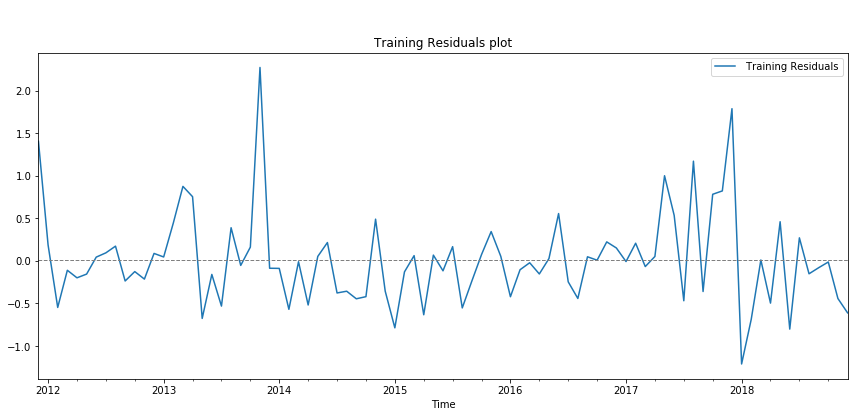

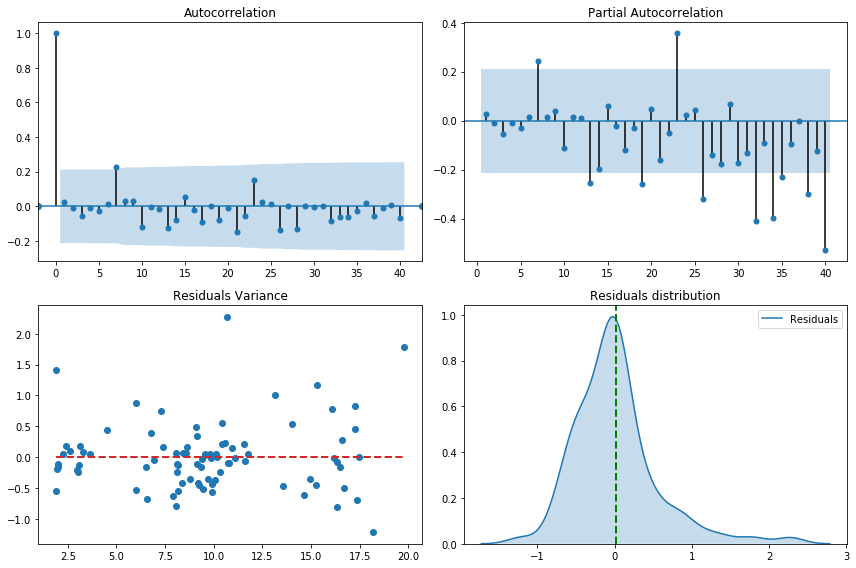


Residuals statistics:
   Mean     : 0.013  
   Variance : 0.304


Residuals Stationary Test(Dickey-Fuller):
Test Statistic                -9.105499e+00
p-value                        3.511725e-15
No of Lags Used                0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64

The Residuals are Stationary at 1%, 5% & 10% Significance level


In [56]:
resid_exam(train['resid'],autoARIMA_model)

# Auto ARIMA forecasting

In [68]:
trace0 = go.Line(x=df.index, y=df.Weighted_Price, name='Actual values');
trace1 = go.Line(x=test.index, y=test.autoARIMA_pred, name='Auto-ARIMA Predictions');
layout = dict(title={'text': "Froecast values of Auto-ARIMA model\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

# Exponential Smoothing Froecasting (Extra)

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [61]:
model1 = ExponentialSmoothing(train['Weighted_Price_box'].astype('float64'), trend='mul',seasonal='mul',seasonal_periods=12).fit()  

In [62]:
test['Smforecast']= invboxcox(model1.forecast(16) ,lam)

In [63]:
trace0 = go.Line(x=test.index, y=test.Weighted_Price, name='Actual values');
trace1 = go.Line(x=test.index, y=test.Smforecast, name='Exponential Smoothing Predictions');
layout = dict(title={'text': "Actual data vs Prediction for Exponential Smoothing model\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

In [64]:
trace0 = go.Line(x=train.index, y=train.Weighted_Price, name='Actual train values');
trace1 = go.Line(x=train.index, y=invboxcox(model1.fittedvalues,lam), name='Exponential Smoothing train Predictions');
layout = dict(title={'text': "Actual data vs Prediction for Exponential smoothing model training data\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

In [66]:
def resid_exam(residuals, model):
    """The Residuals will be examined to check for any room for improvement and also to verify the properties of the residuals.The parameters needed are True values of Y , Training residuals and model's name respectively"""
    residuals.plot(figsize=(14.5,6),title='\n\nTraining Residuals plot', label=' Training Residuals',legend=True)
    plt.axhline(residuals.mean(), color='grey', linestyle='--', linewidth=1)
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    import seaborn as sns 
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))
    plot_acf(residuals,lags=40, ax=ax1, marker='o')
    plot_pacf(residuals,lags=40, ax=ax2,method='ols',zero=False)
    ax3.scatter(x=model.fittedvalues,y=residuals, label='Residuals')
    ax3.plot( [min(model.fittedvalues),max(model.fittedvalues)],[0,0] ,color='tab:red', lw=2, linestyle='--');
    ax3.set_title('Residuals Variance')
    ax4=sns.kdeplot(data=residuals ,label='Residuals',shade=True);
    ax4.set_title('Residuals distribution')
    ax4.axvline(residuals.mean(), color='g', linestyle='dashed', linewidth=2)
    plt.tight_layout()
    plt.show()
    print('\nResiduals statistics:')
    print(f"   Mean     : {round(residuals.mean(),3)}  \n   Variance : {round(residuals.var(),3)}\n")
    print('\nResiduals Stationary Test(Dickey-Fuller):')
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    stest = adfuller(residuals.dropna(), autolag='AIC')
    soutput = pd.Series(stest[0:4], index=['Test Statistic','p-value','No of Lags Used','Number of Observations Used'])
    for key,value in stest[4].items():
        soutput['Critical Value (%s)'%key] = value
    print (soutput)
    while True:
        if soutput['p-value'] <= 0.01:
            print('\nThe Residuals are Stationary at 1%, 5% & 10% Significance level')
            break
        elif (soutput['p-value'] <= 0.05) and (soutput['p-value'] > 0.01):
            print('\nThe Residuals are Stationary at 5% & 10% Significance level but not at 1%')
            break
        elif (soutput['p-value'] <= 0.10) and (soutput['p-value'] > 0.05):
            print('\nThe Residuals are Stationary at 10% Significance level but not at 5% or 1%')
            break
        else:
            print('\nThe Residuals are Non-Stationary')
            break
    

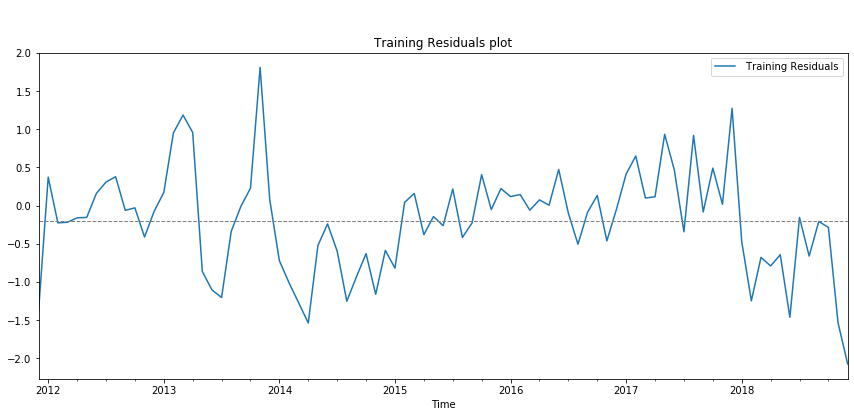

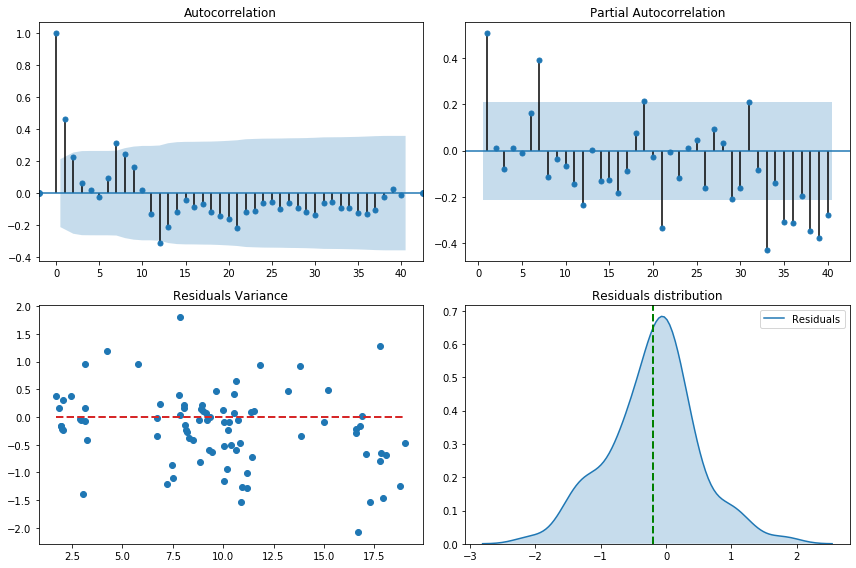


Residuals statistics:
   Mean     : -0.2  
   Variance : 0.471


Residuals Stationary Test(Dickey-Fuller):
Test Statistic                 -0.921460
p-value                         0.780823
No of Lags Used                 6.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64

The Residuals are Non-Stationary


In [67]:
resid_exam(model1.resid, model1)

In [86]:
trace0 = go.Line(x=df.index, y=df.Weighted_Price, name='Actual values');
trace1 = go.Line(x=test.index, y=test.Smforecast, name='Exponential smoothing Predictions');
layout = dict(title={'text': "Froecast values of Exponential smoothing  model\n",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Weighted Price in $')
            );
data = [trace0,trace1]

fig = go.Figure(data = data, layout = layout);
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show();

# Conclusion

Out of all the models the best model is Auto-ARIMA which forecasted better than all the models